In [1]:
%matplotlib inline
import seaborn
import quandl
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
token="Us3wFmXGgAj_1cUtHAAR"

import pylab
pylab.rcParams['figure.figsize'] = (12, 8)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
treas = quandl.get("CHRIS/CME_TY1", authtoken=token).Last
stocks = quandl.get("CHRIS/CME_ES1", authtoken=token).Last

Loop over
  calculate pnl 
  adjust trade



/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,min_periods=0,adjust=True,com=80).mean()
  from IPython.kernel.zmq import kernelapp as app
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,min_periods=0,adjust=True,com=250).mean()
  from IPython.kernel.zmq import kernelapp as app


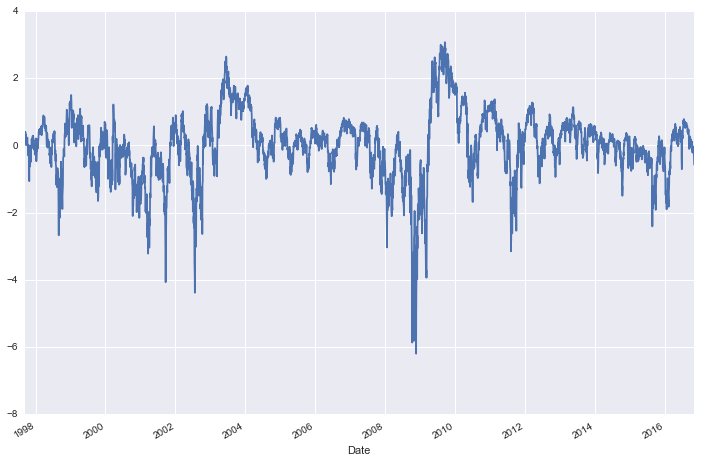

In [7]:
df = pd.DataFrame()
df['Signal']=(pd.ewma(stocks.pct_change(),80)-pd.ewma(stocks.pct_change(),250))
df['zscore'] = (df.Signal - df.Signal.mean())/df.Signal.std(ddof=0)
df.zscore.plot()

In [8]:
def ewmom(data,short_lookback,long_lookback):
    df = pd.DataFrame()
    df['Signal']=(pd.ewma(data.pct_change(),short_lookback)-pd.ewma(data.pct_change(),long_lookback))
    df['zscore'] = (df.Signal - df.Signal.mean())/df.Signal.std(ddof=0)
    return df.zscore

In [9]:
for index, row in df.head().iterrows():
    print row.Signal

nan
0.0
2.67501972857e-05
0.000106777264703
8.35319507497e-05


/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: pd.ewm_std is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,min_periods=0,adjust=True,com=20).std(bias=False)
  from IPython.kernel.zmq import kernelapp as app
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,min_periods=0,adjust=True,com=80).mean()
  app.launch_new_instance()
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,min_periods=0,adjust=True,com=250).mean()
  app.launch_new_instance()
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: FutureWarning: pd.ewm

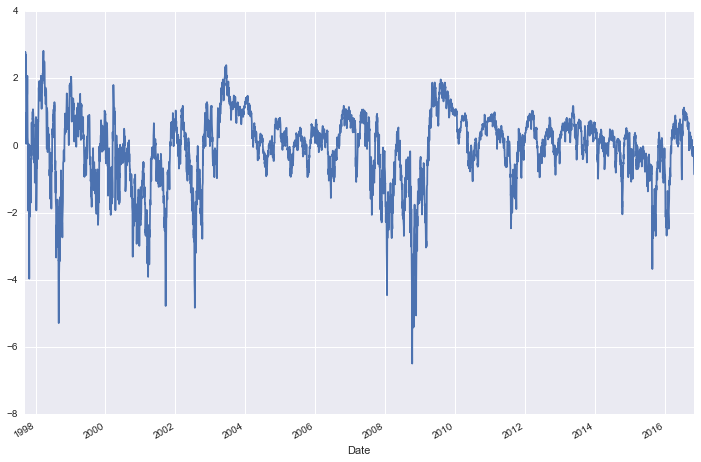

In [10]:
df = pd.DataFrame()
df['vol']=pd.ewmstd(stocks.pct_change(),20)*16
df['signal']=(pd.ewma(stocks.pct_change(),80)-pd.ewma(stocks.pct_change(),250))
df['signal_vol']=pd.ewmstd(df.signal,500)
df['zscore'] = (df.signal - df.signal.mean())/df.signal_vol
df['position']=df.zscore/df.vol
df.zscore.plot()


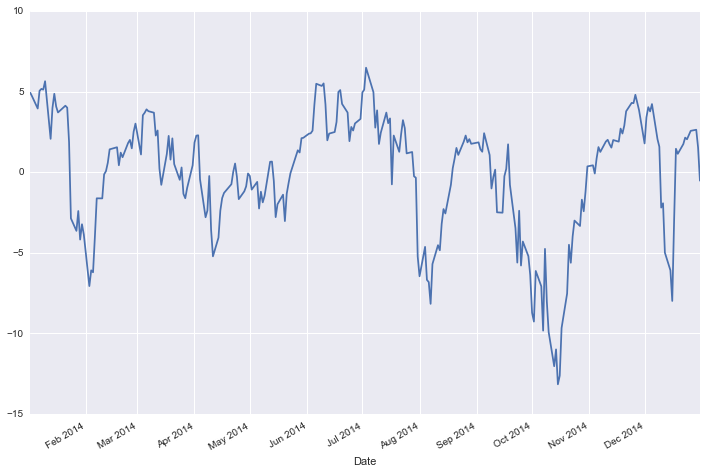

In [77]:
df.position['2014'].plot()

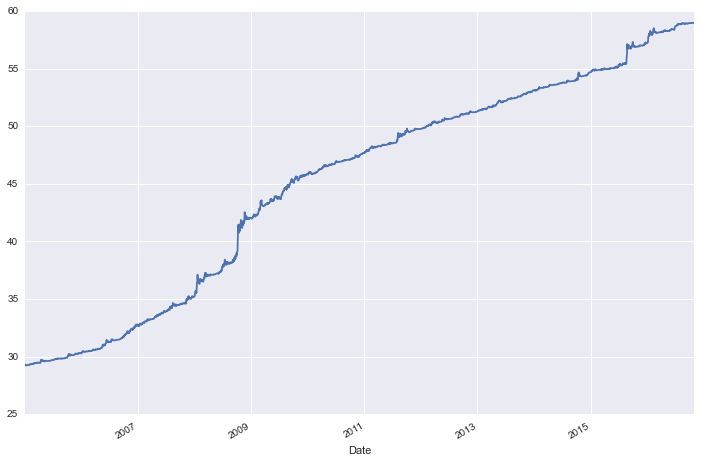

In [78]:
(df.position*stocks.pct_change().shift(1)).cumsum()['2005':].plot()

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: pd.ewm_std is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,min_periods=0,adjust=True,com=50).std(bias=False)
  if __name__ == '__main__':


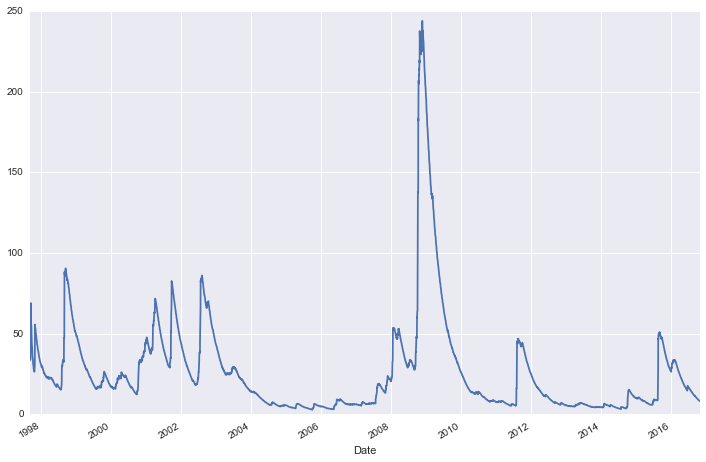

In [79]:
(pd.ewmstd(df.zscore*stocks.pct_change().shift(1),50)*1600).plot()